In [2]:
import pandas as pd

data = pd.read_csv("../../../../../bigcontest/data/preprocessed/data.csv")

In [17]:
data = pd.get_dummies(data = data, columns = ['income_type','employment_type','houseown_type','purpose'])

In [3]:
data['is_applied'].value_counts()

0    9709675
1     554711
Name: is_applied, dtype: int64

In [3]:
data['is_applied'].value_counts() / len(data)

0    0.945958
1    0.054042
Name: is_applied, dtype: float64

In [4]:
# !pip install imblearn

In [18]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('is_applied', axis = 1)
y = data['is_applied']

rus = RandomUnderSampler(sampling_strategy = 0.65, random_state = 42)
X, y = rus.fit_resample(X, y)

In [6]:
y.value_counts() / len(y)

0    0.60606
1    0.39394
Name: is_applied, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   shuffle = True, random_state = 42)

In [8]:
y_train.value_counts() / len(y_train)

0    0.606051
1    0.393949
Name: is_applied, dtype: float64

In [9]:
y_test.value_counts() / len(y_test)

0    0.606083
1    0.393917
Name: is_applied, dtype: float64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [14]:
clf = RandomForestClassifier(random_state=0)
clf_param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [4, 6, 8, 10],
    'min_samples_leaf' : [3, 5, 6, 7],
    'min_samples_split' : [2, 3, 5, 7]
}
clf_grid = GridSearchCV(clf, param_grid = clf_param_grid, scoring="f1", n_jobs= -1, cv = 2, verbose = 3)

In [20]:
clf_grid.fit(X_train,y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [3, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=3)

In [21]:
clf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [22]:
clf_grid.best_score_

0.6703060551767901

In [24]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10,min_samples_leaf = 3, min_samples_split = 2, random_state=0)
clf.fit(X_train,y_train)



predict1 = clf.predict(X_test)
print(accuracy_score(y_test, predict1))
print(f1_score(y_test, predict1))

0.756503974585379
0.6668437264167749


In [25]:
mdi_importances = pd.Series(
    clf.feature_importances_, index=clf.feature_names_in_
    ).sort_values(ascending=True)

C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  ax.figure.tight_layout()
C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  ax.figure.tight_layout()
C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  ax.figure.tight_layout()
C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  ax.figure.tight_layout()
C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  ax.figure.tight_layout()
C:\Users\25211-1\AppData\Local\Temp\ipykernel_7216\698222001.py:3: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.

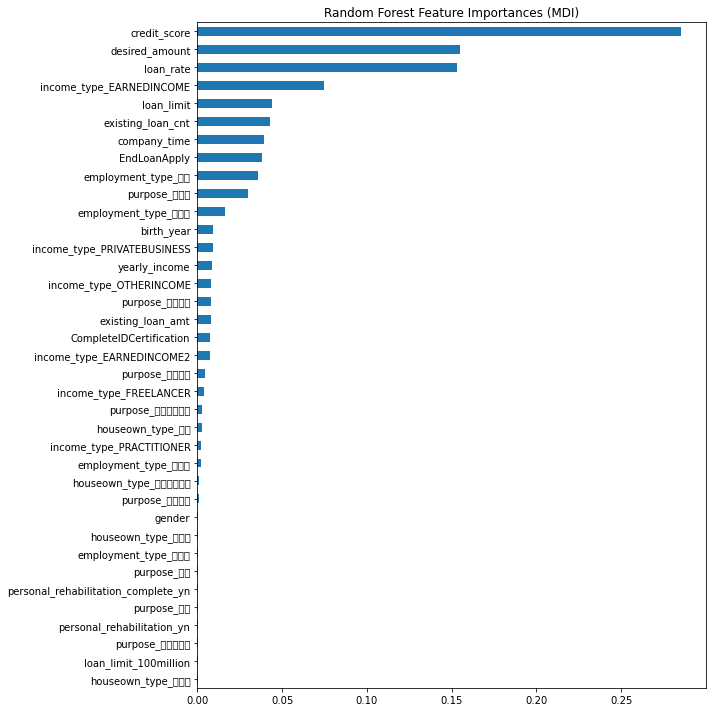

In [27]:
ax = mdi_importances.plot.barh(figsize = (10,10))
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()